In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
data = pd.read_csv("/content/train.csv")
data.shape


(1460, 81)

In [7]:
features = ["GrLivArea", "BedroomAbvGr", "Neighborhood"]
target = "SalePrice"

X = data[features]
y = data[target]


In [8]:
# Numerical features
X["GrLivArea"].fillna(X["GrLivArea"].median(), inplace=True)
X["BedroomAbvGr"].fillna(X["BedroomAbvGr"].median(), inplace=True)

# Categorical feature
X["Neighborhood"].fillna(X["Neighborhood"].mode()[0], inplace=True)


/tmp/ipython-input-2032493949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["GrLivArea"].fillna(X["GrLivArea"].median(), inplace=True)
/tmp/ipython-input-2032493949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["GrLivArea"].fillna(X["GrLivArea"].median(), inplace=True)
/tmp/ipython-input-2032493949.py:3: FutureWarning: A value 

In [9]:
numeric_features = ["GrLivArea", "BedroomAbvGr"]
categorical_features = ["Neighborhood"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("linear_regression", LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['GrLivArea',
                                                   'BedroomAbvGr']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Neighborhood'])])),
                ('linear_regression', LinearRegression())])

In [12]:
y_pred = model.predict(X_test)


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 41863.24
R² Score: 0.772


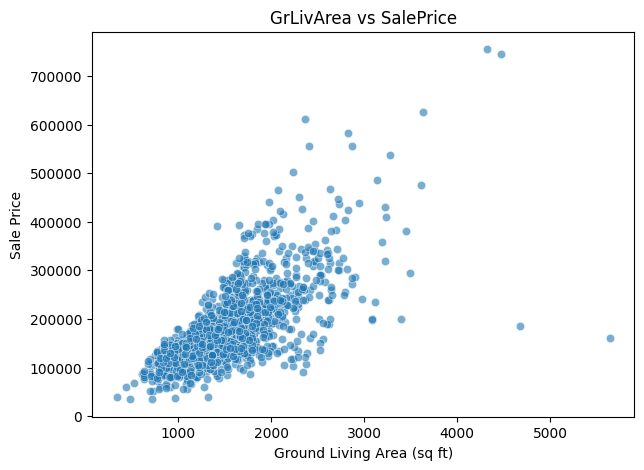

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data["GrLivArea"], y=data["SalePrice"], alpha=0.6)
plt.xlabel("Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("GrLivArea vs SalePrice")
plt.show()


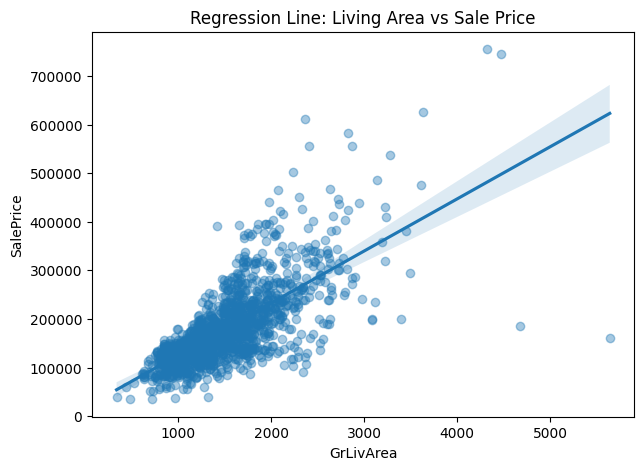

In [15]:
plt.figure(figsize=(7,5))
sns.regplot(x=data["GrLivArea"], y=data["SalePrice"], scatter_kws={"alpha":0.4})
plt.title("Regression Line: Living Area vs Sale Price")
plt.show()


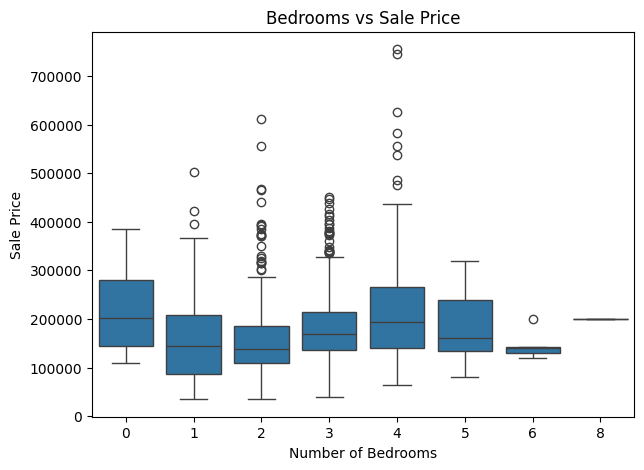

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x=data["BedroomAbvGr"], y=data["SalePrice"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Sale Price")
plt.title("Bedrooms vs Sale Price")
plt.show()
